# Team Project

In [ ]:
# libraries to import
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpltlib
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [ ]:
crime = pd.read_csv("Neighbourhood_Crime_Rates.csv")
# keep relevant variables for analysis. since the other csv contains data from 2016, only focus on 2016 data
crime_cleaned = crime[['Neighbourhood', 'F2020_Population_Projection','Assault_2016', 'Assault_Rate2016', 'AutoTheft_2016', 'AutoTheft_Rate2016',
                      'BreakAndEnter_2016', 'BreakAndEnter_Rate2016', 'Robbery_2016', 'Robbery_Rate2016',
                      'TheftOver_2016', 'TheftOver_Rate2016', 'Homicide_2016', 'Homicide_Rate2016',
                      'Shootings_2016', 'Shootings_Rate2016', 'Shape__Area', 'Shape__Length']]

In [ ]:
# "Rate" variables are rates per 100,000 people by neighbourhood using projected population
crime_cleaned.columns

Index(['Neighbourhood', 'F2020_Population_Projection', 'Assault_2016',
       'Assault_Rate2016', 'AutoTheft_2016', 'AutoTheft_Rate2016',
       'BreakAndEnter_2016', 'BreakAndEnter_Rate2016', 'Robbery_2016',
       'Robbery_Rate2016', 'TheftOver_2016', 'TheftOver_Rate2016',
       'Homicide_2016', 'Homicide_Rate2016', 'Shootings_2016',
       'Shootings_Rate2016', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [ ]:
# take a glimpse at dataset
crime_cleaned.head(10)

,Neighbourhood,F2020_Population_Projection,Assault_2016,Assault_Rate2016,AutoTheft_2016,AutoTheft_Rate2016,BreakAndEnter_2016,BreakAndEnter_Rate2016,Robbery_2016,Robbery_Rate2016,TheftOver_2016,TheftOver_Rate2016,Homicide_2016,Homicide_Rate2016,Shootings_2016,Shootings_Rate2016,Shape__Area,Shape__Length
0,Yonge-St.Clair,14083,34,262.5482,7,54.05405,12,92.66409,6,46.33205,7,54.054050,0,0.000000,1,0.772201,1.161315e+06,5873.270507
1,York University Heights,30277,363,1269.3200,106,370.65530,98,342.68130,70,244.77240,38,132.876400,2,0.699350,4,1.398699,1.324666e+07,18504.777616
2,Lansing-Westgate,18146,67,400.6698,26,155.48380,41,245.18600,6,35.88087,5,29.900730,0,0.000000,1,0.598015,5.346186e+06,11112.109419
3,Yorkdale-Glen Park,17560,175,1149.1990,41,269.24090,66,433.41210,24,157.60440,26,170.738100,1,0.656685,3,1.970055,6.038326e+06,10079.426837
4,Stonegate-Queensway,27410,78,302.5249,14,54.29934,49,190.04770,13,50.42082,4,15.514100,0,0.000000,0,0.000000,7.946202e+06,11853.189803
5,Tam O'Shanter-Sullivan,29970,100,354.1829,21,74.37841,62,219.59340,24,85.00390,8,28.334630,0,0.000000,2,0.708366,5.422345e+06,10750.468290
6,The Beaches,23364,81,364.7170,7,31.51875,77,346.70630,19,85.55090,3,13.508040,0,0.000000,0,0.000000,3.595829e+06,11275.181284
7,Thistletown-Beaumond Heights,10948,46,430.8730,15,140.50210,23,215.43650,15,140.50210,1,9.366804,0,0.000000,2,1.873361,3.339481e+06,10828.444269
8,Thorncliffe Park,23518,88,403.4846,4,18.34021,24,110.04130,15,68.77579,11,50.435580,1,0.458505,1,0.458505,3.126554e+06,7502.709320
9,Danforth East York,18427,41,231.4031,12,67.72774,42,237.04710,4,22.57591,4,22.575910,0,0.000000,0,0.000000,2.188598e+06,7623.857803


In [ ]:
# neighbourhood profiles seems to be in a wide format while neighbourhood crimes is long...
profiles = pd.read_csv("neighbourhood-profiles-2016-140-model.csv")
profiles

"""
KEEP 2016 POPULATION VARIABLE to mutate new rate variables

Interesting things we can analyze with crime rate from neighbourhood profiles:
does higher population => higher crime rate?
does neighbourhood with higher old population => higher crime rate?
- can also include old people living alone
neighbourhoods with high average income => higher crime rate?
neighbourhoods with more fancy homes => higher crime rate?
"""

'\nKEEP 2016 POPULATION VARIABLE to mutate new rate variables\n\nInteresting things we can analyze with crime rate from neighbourhood profiles:\ndoes higher population => higher crime rate?\ndoes neighbourhood with higher old population => higher crime rate?\n- can also include old people living alone\nneighbourhoods with high average income => higher crime rate?\nneighbourhoods with more fancy homes => higher crime rate?\n'

In [ ]:
%%capture --no-display
# David's heat map stuff
tor_map = "Neighbourhoods.shp"
# read .shp file and make a common joining factor
regions = gpd.read_file(tor_map)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '')
# keep coordinates, polygons, and neighbourhood name
regions_cleaned = regions[['FIELD_11', 'FIELD_12', 'geometry', 'neighbourhood']]
regions_cleaned.head(5)

,FIELD_11,FIELD_12,geometry,neighbourhood
0,-79.425515,43.676919,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood
1,-79.403590,43.704689,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",Yonge-Eglinton
2,-79.397871,43.687859,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",Yonge-St.Clair
3,-79.488883,43.765736,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights
4,-79.457108,43.714672,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park


In [ ]:
# join crime data and heat map data
merged = regions_cleaned.set_index('neighbourhood').join(crime_cleaned.set_index('Neighbourhood'))
merged = merged.reset_index()
merged = merged.fillna(0)

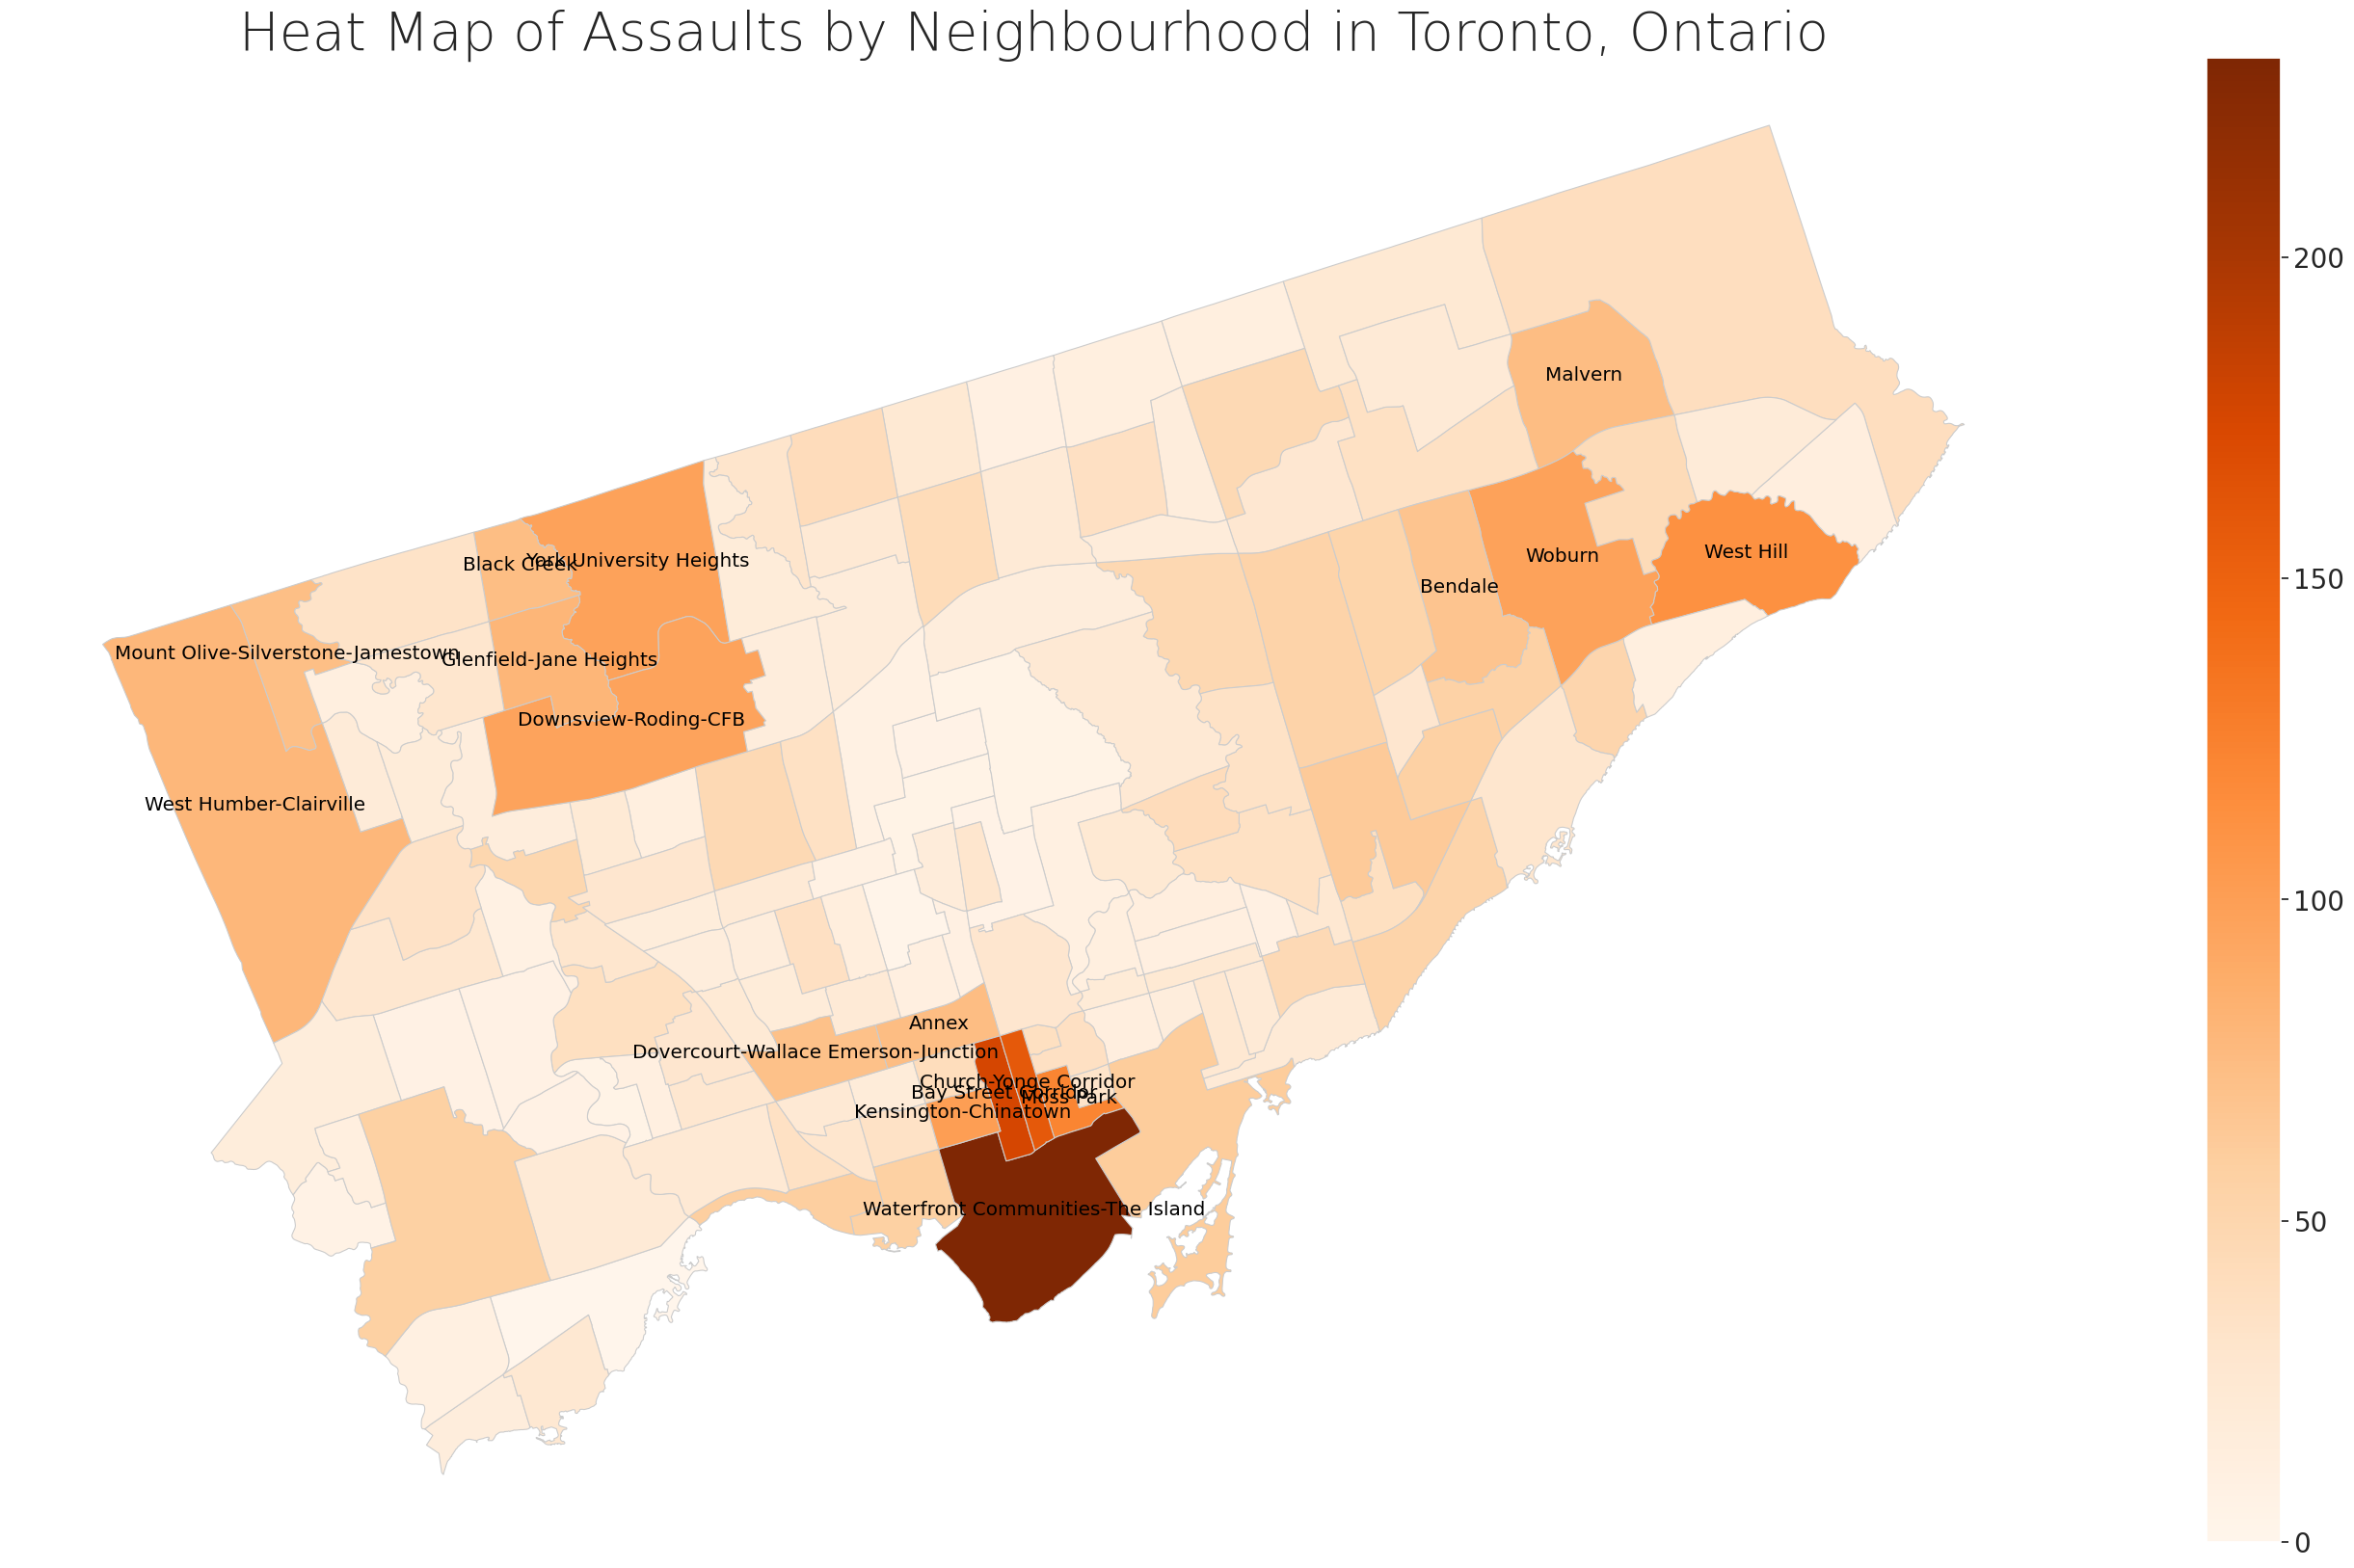

In [ ]:
%%capture --no-display
# make the plot
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Assaults by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Assault_2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

for idx, row in merged.iterrows():
    if(row['Assault_2016'] > 250):
        plt.annotate(text=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)

plt.show()

In [ ]:
merged.head(1)

,neighbourhood,FIELD_11,FIELD_12,geometry,F2020_Population_Projection,Assault_2016,Assault_Rate2016,AutoTheft_2016,AutoTheft_Rate2016,BreakAndEnter_2016,...,Robbery_2016,Robbery_Rate2016,TheftOver_2016,TheftOver_Rate2016,Homicide_2016,Homicide_Rate2016,Shootings_2016,Shootings_Rate2016,Shape__Area,Shape__Length
0,Wychwood,-79.425515,43.676919,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",16037.0,80.0,540.5771,18.0,121.6298,30.0,...,9.0,60.81492,4.0,27.02885,0.0,0.0,0.0,0.0,1.682111e+06,5435.022062


In [ ]:
type(merged)

geopandas.geodataframe.GeoDataFrame